# Bank Marketing Dataset
    This dataset is based on the "Bank Marketing" UCI dataset (please check the description at: http://archive.ics.uci.edu/ml/datasets/Bank+Marketing). 

 

    It contains information about the marketing campaign impact of a bank specifically through telemarketing. It includes 20 independent variables of which 5 are the nationwide socio-economic factors pertaining to the bank's operating country. The attributes are as follows;

 

#### Input variables:
    age : 
    job : type of job  
    marital : marital status  
    education : education level
    default: Does the customer have credit in default?  
    housing: Does the customer have a housing loan?  
    loan: Does the customer have a personal loan?  

   Related with the last contact of the current campaign:
   
    Contact: contact communication type  
    Month: last contact month of year                   
    day_of_week: last contact day of the week  
    Duration: last contact duration, in seconds. Important note:  this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call ‘y’ is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

   Other attributes:
    
    Campaign: Number of contacts performed during this campaign a 
    pdays: Number of days that passed by after the client was last contacted  
    Previous: number of contacts performed before this campaign and for this client
    poutcome: outcome of the previous marketing campaign  

   #### Output variable:
     
    y - has the client subscribed to a term deposit?  

In [1]:
#importing libraries

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import missingno as msno
import scipy.stats as stats
import os
import warnings
warnings.filterwarnings("ignore")

In [2]:
#loading files in dataframe
files = os.listdir('F://somya//python_code//socioeconomic data//') 
bank_marketing_data=pd.DataFrame()
for file in files:
    df=pd.read_csv('F://somya//python_code//socioeconomic data//'+file,sep=';')
    bank_marketing_data=pd.concat([bank_marketing_data,df]) 
    
#reading multiple files from folder
#and adding them into one dataframe

In [3]:
bank_marketing_data.shape #checking observation and features count

(49732, 17)

In [4]:
bank_marketing_data.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49732 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        49732 non-null  int64 
 1   job        49732 non-null  object
 2   marital    49732 non-null  object
 3   education  49732 non-null  object
 4   default    49732 non-null  object
 5   balance    49732 non-null  int64 
 6   housing    49732 non-null  object
 7   loan       49732 non-null  object
 8   contact    49732 non-null  object
 9   day        49732 non-null  int64 
 10  month      49732 non-null  object
 11  duration   49732 non-null  int64 
 12  campaign   49732 non-null  int64 
 13  pdays      49732 non-null  int64 
 14  previous   49732 non-null  int64 
 15  poutcome   49732 non-null  object
 16  y          49732 non-null  object
dtypes: int64(7), object(10)
memory usage: 6.8+ MB


In [5]:
bank_marketing_data.nunique() #checking unique values in all columns

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
y               2
dtype: int64

checking all object type columns if they are categorical columns or there erronous value exist 

In [6]:
bank_marketing_data.job.unique() #checking unquie values of the particular column

array(['unemployed', 'services', 'management', 'blue-collar',
       'self-employed', 'technician', 'entrepreneur', 'admin.', 'student',
       'housemaid', 'retired', 'unknown'], dtype=object)

In [7]:
bank_marketing_data.marital.unique() 

array(['married', 'single', 'divorced'], dtype=object)

In [8]:
bank_marketing_data.education.unique() 

array(['primary', 'secondary', 'tertiary', 'unknown'], dtype=object)

In [9]:
bank_marketing_data.default.unique() 

array(['no', 'yes'], dtype=object)

In [10]:
bank_marketing_data.housing.unique() 

array(['no', 'yes'], dtype=object)

In [11]:
bank_marketing_data.loan.unique() 

array(['no', 'yes'], dtype=object)

In [12]:
bank_marketing_data.contact.unique() 

array(['cellular', 'unknown', 'telephone'], dtype=object)

In [13]:
bank_marketing_data.poutcome.unique() 

array(['unknown', 'failure', 'other', 'success'], dtype=object)

In [14]:
bank_marketing_data.y.unique() 

array(['no', 'yes'], dtype=object)

In [15]:
bank_marketing_data.month.unique() 

array(['oct', 'may', 'apr', 'jun', 'feb', 'aug', 'jan', 'jul', 'nov',
       'sep', 'mar', 'dec'], dtype=object)

converting all object type columns into categorical as they all are categorical columns

In [16]:
columns=['job','marital','education','default','housing','loan','contact','poutcome','month','y']
for col in columns:
    bank_marketing_data=bank_marketing_data.astype({col:'category'})
     

In [17]:
bank_marketing_data.info() #checking datatpe converted correctly or not

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49732 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        49732 non-null  int64   
 1   job        49732 non-null  category
 2   marital    49732 non-null  category
 3   education  49732 non-null  category
 4   default    49732 non-null  category
 5   balance    49732 non-null  int64   
 6   housing    49732 non-null  category
 7   loan       49732 non-null  category
 8   contact    49732 non-null  category
 9   day        49732 non-null  int64   
 10  month      49732 non-null  category
 11  duration   49732 non-null  int64   
 12  campaign   49732 non-null  int64   
 13  pdays      49732 non-null  int64   
 14  previous   49732 non-null  int64   
 15  poutcome   49732 non-null  category
 16  y          49732 non-null  category
dtypes: category(10), int64(7)
memory usage: 3.5 MB


In [20]:
#checking data summary  for category variables
bank_marketing_data.describe(include='category')

,job,marital,education,default,housing,loan,contact,month,poutcome,y
count,49732,49732,49732,49732,49732,49732,49732,49732,49732,49732
unique,12,3,4,2,2,2,3,12,4,2
top,blue-collar,married,secondary,no,yes,no,cellular,may,unknown,no
freq,10678,30011,25508,48841,27689,41797,32181,15164,40664,43922


In [21]:
#checking data summary for the numerical columns
bank_marketing_data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,49732.000000,49732.000000,49732.000000,49732.000000,49732.000000,49732.000000,49732.000000
mean,40.957472,1367.761562,15.816315,258.690179,2.766549,40.158630,0.576892
std,10.615008,3041.608766,8.315680,257.743149,3.099075,100.127123,2.254838
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1431.000000,21.000000,320.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


    age columns is ok
    balnce column is showing negative data, its can't be negative or we can say that the negative value means loan is directly reflecting on balance column.
    duration column is 0 which means call is not connected we can change this column in to categorical 
    pdays is more than 75% data is negative so dropping that column
    Previous is more than 75% data is 0 so dropping that column

In [22]:
bank_marketing_data['duration']=bank_marketing_data['duration'].apply(lambda x:'y' if x>0 else 'n') #changing duration column values

In [23]:
# balance can't be minus so changing it into 0
bank_marketing_data['balance']=bank_marketing_data['balance'].apply(lambda x:0 if x<0 else x) 

In [24]:
bank_marketing_data=bank_marketing_data.astype({'duration':'category','balance':'float'}) #changing duration column datatype

In [25]:
bank_marketing_data= bank_marketing_data.drop(columns=['pdays']) # droping pdays  column because it has more than 75% wrong data
bank_marketing_data= bank_marketing_data.drop(columns=['previous']) # droping previous  column because it has more than 75% wrong data 

In [26]:
bank_marketing_data.describe(include='all') #checking data again

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,poutcome,y
count,49732.000000,49732,49732,49732,49732,49732.000000,49732,49732,49732,49732.000000,49732,49732,49732.000000,49732,49732
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,2,NaN,4,2
top,NaN,blue-collar,married,secondary,no,NaN,yes,no,cellular,NaN,may,y,NaN,unknown,no
freq,NaN,10678,30011,25508,48841,NaN,27689,41797,32181,NaN,15164,49729,NaN,40664,43922
mean,40.957472,NaN,NaN,NaN,NaN,1394.243043,NaN,NaN,NaN,15.816315,NaN,NaN,2.766549,NaN,NaN
std,10.615008,NaN,NaN,NaN,NaN,3026.313354,NaN,NaN,NaN,8.315680,NaN,NaN,3.099075,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,1.000000,NaN,NaN,1.000000,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,72.000000,NaN,NaN,NaN,8.000000,NaN,NaN,1.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,448.000000,NaN,NaN,NaN,16.000000,NaN,NaN,2.000000,NaN,NaN
75%,48.000000,NaN,NaN,NaN,NaN,1431.000000,NaN,NaN,NaN,21.000000,NaN,NaN,3.000000,NaN,NaN


Checking duplicates and removing them

In [27]:
bank_marketing_data.shape # no of rows and featurs

(49732, 15)

In [33]:
#checking duplicates
bank_marketing_data.duplicated().sum()

4581

In [34]:
#dropping duplicates
bank_marketing_data=bank_marketing_data.drop_duplicates(subset=None, keep='first', inplace=False)

In [35]:
bank_marketing_data.shape #after removing duplicates no of rows and columns

(45151, 15)

In [36]:
bank_marketing_data[bank_marketing_data.index.duplicated()] #checking duplicat indexes

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,poutcome,y
0,58,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,y,1,unknown,no
1,44,technician,single,secondary,no,29.0,yes,no,unknown,5,may,y,1,unknown,no
2,33,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,y,1,unknown,no
3,47,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,y,1,unknown,no
4,33,unknown,single,unknown,no,1.0,no,no,unknown,5,may,y,1,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4515,56,entrepreneur,married,tertiary,no,8741.0,yes,no,unknown,20,may,y,3,unknown,no
4516,37,blue-collar,married,secondary,no,362.0,yes,no,unknown,20,may,y,2,unknown,no
4517,33,blue-collar,married,primary,no,163.0,yes,no,unknown,20,may,y,1,unknown,no
4518,40,blue-collar,married,primary,no,0.0,yes,no,unknown,20,may,y,3,unknown,no


there is duplicate index exist which will create error in visualization so resetting the indexes

In [37]:
i=np.arange(0,len(bank_marketing_data))
bank_marketing_data.index=i

In [38]:
#after resetting checking if still duplicate indexes exist or not
bank_marketing_data[bank_marketing_data.index.duplicated()]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,poutcome,y


In [39]:
bank_marketing_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45151 entries, 0 to 45150
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        45151 non-null  int64   
 1   job        45151 non-null  category
 2   marital    45151 non-null  category
 3   education  45151 non-null  category
 4   default    45151 non-null  category
 5   balance    45151 non-null  float64 
 6   housing    45151 non-null  category
 7   loan       45151 non-null  category
 8   contact    45151 non-null  category
 9   day        45151 non-null  int64   
 10  month      45151 non-null  category
 11  duration   45151 non-null  category
 12  campaign   45151 non-null  int64   
 13  poutcome   45151 non-null  category
 14  y          45151 non-null  category
dtypes: category(11), float64(1), int64(3)
memory usage: 3.2 MB


Checking for missing values

<AxesSubplot:>

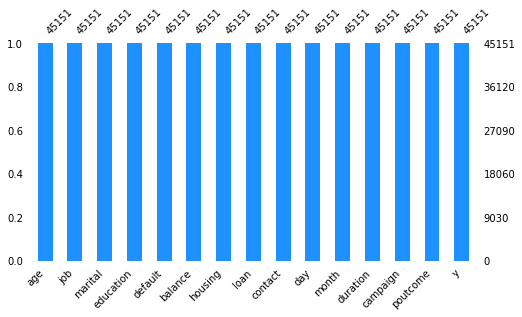

In [40]:
msno.bar(bank_marketing_data, figsize=(8,4), fontsize=10, color="dodgerblue")

<AxesSubplot:>

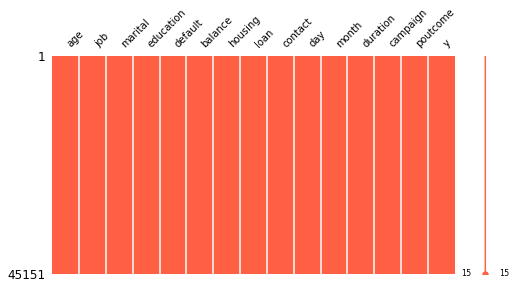

In [36]:
msno.matrix(bank_marketing_data, figsize=(8,4), fontsize=10,color=(1, 0.38, 0.27))

above plots showing there is no missing values

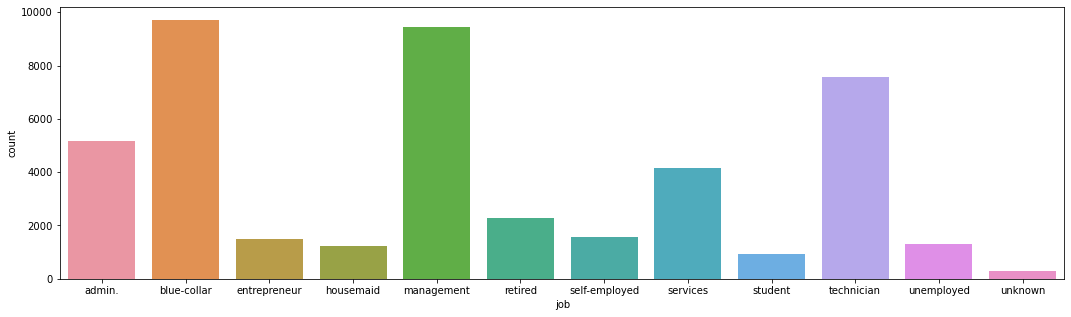

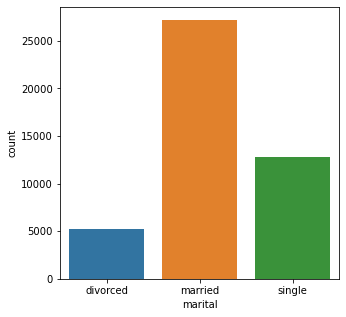

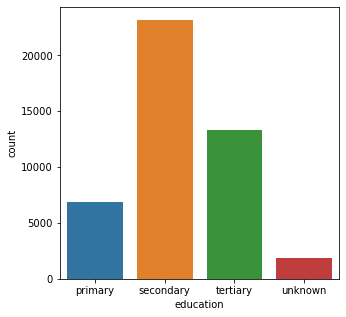

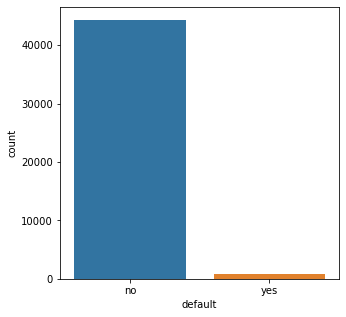

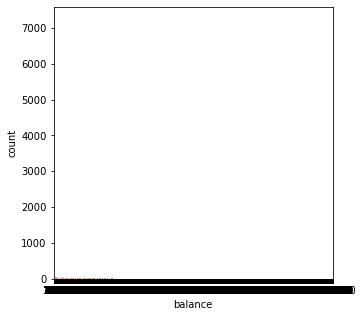

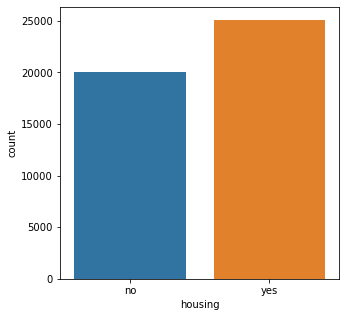

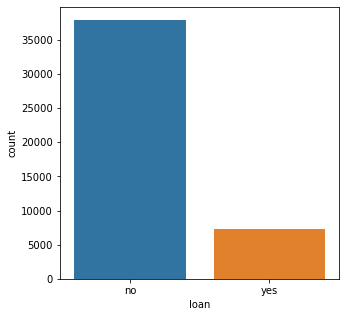

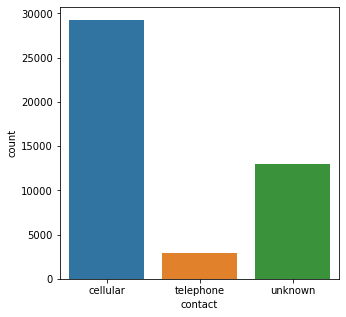

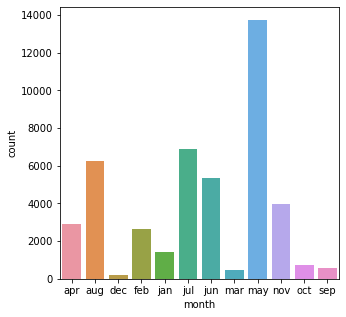

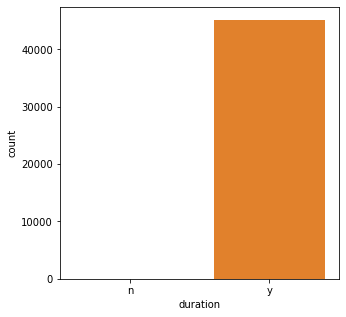

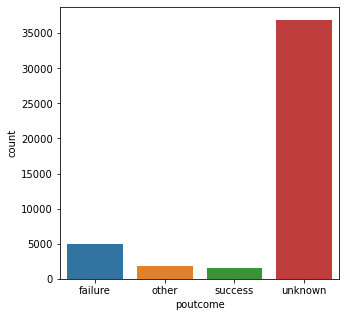

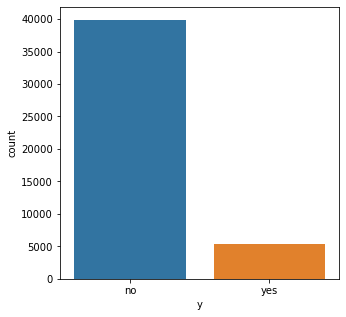

In [39]:
for column in bank_marketing_data: 
    if bank_marketing_data[column].dtype!='int64':
        if column=='job':
            plt.figure(figsize = (18,5))
        else :
            plt.figure(figsize = (5,5))        
        sns.countplot(bank_marketing_data[column])
        plt.show()

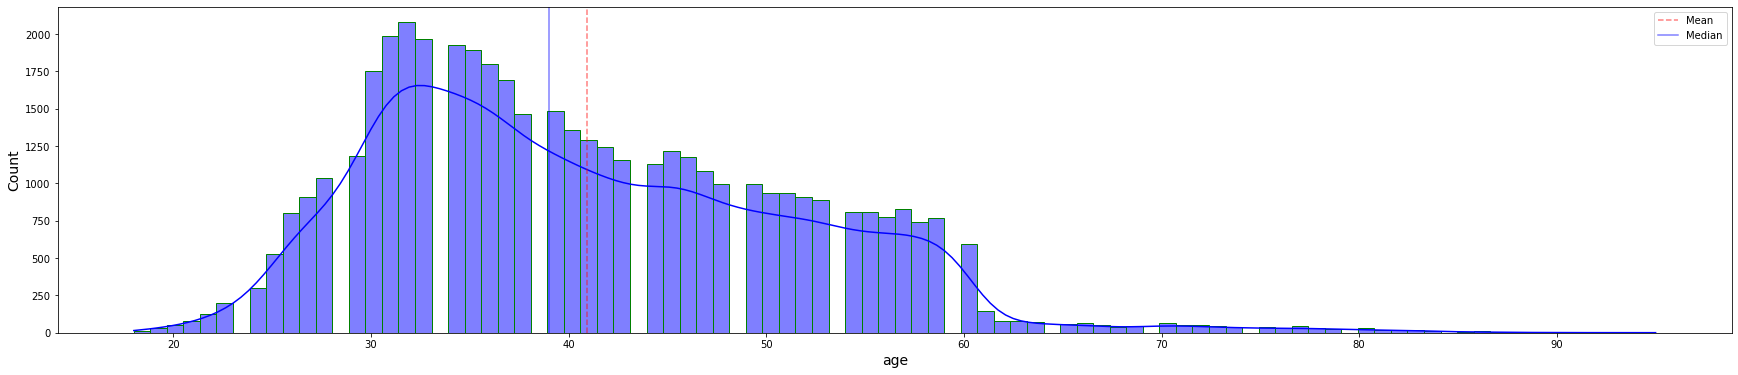

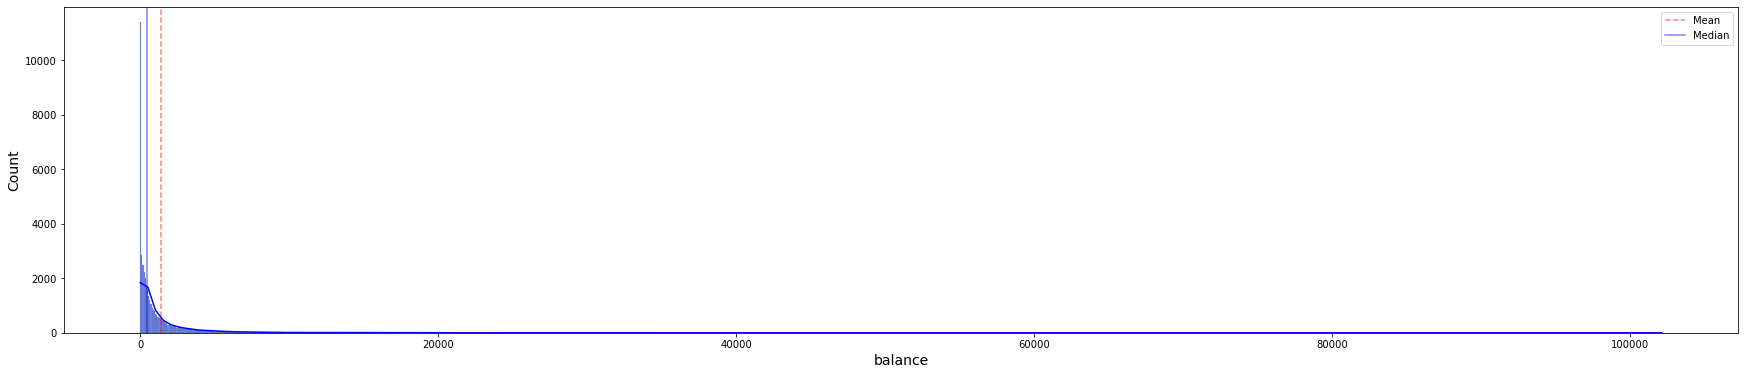

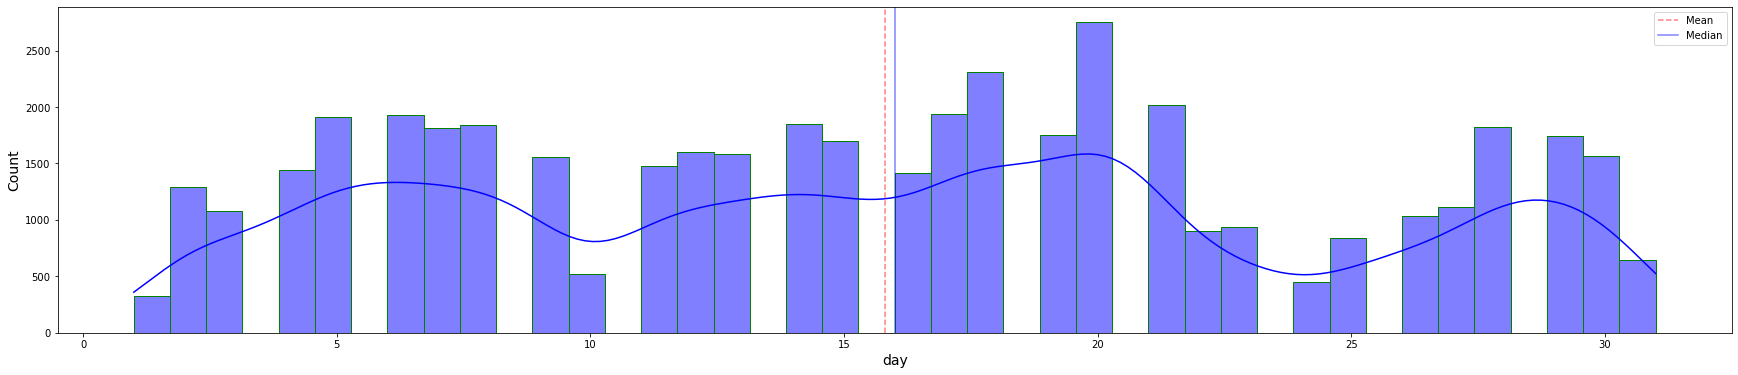

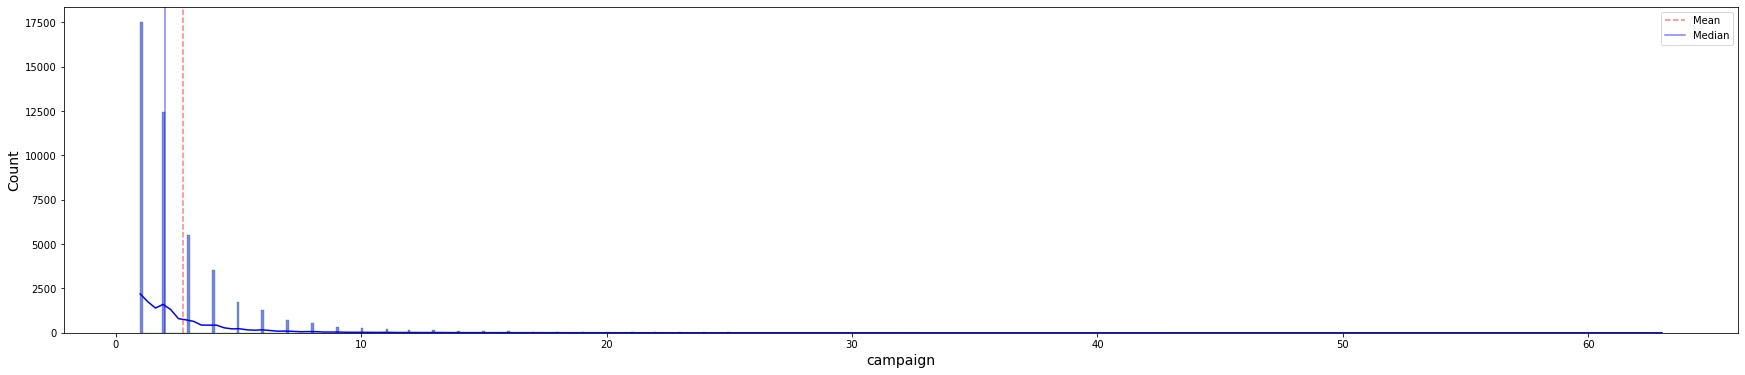

In [40]:
#next going to check for skewness and outliners for the numerical columns
num=['age', 'balance', 'day', 'campaign']
    
for column in num:
    sns.histplot(x=bank_marketing_data[column],kde=True, color='b', edgecolor='green',)
    plt.axvline(x=bank_marketing_data[column].mean(),ls='--',color='red',alpha=0.5,Label='Mean')
    plt.axvline(x=bank_marketing_data[column].median(),color='blue',alpha=0.5,label='Median') 
    plt.xlabel( column, fontsize=14)
    plt.ylabel('Count', fontsize=14) 
    plt.legend()
    plt.show()

from above plot we got to now data is skewed and have ouliners for the columns:

    age, balance,campaign
    
  

In [41]:
# age is having some outliners so checking the numbers where age is greater than 60
bank_marketing_data[bank_marketing_data['age']>60].shape # no of rows 

(1188, 15)

no of rows is less than 1% and in average working age  60 so removing rows where age is greater than 60 because those are the affecting result

In [42]:
 bank_marketing_data.drop(labels=bank_marketing_data[bank_marketing_data['age']>60].index,axis=0,inplace=True)

In [43]:
# Balance seems having extreme outliners
bank_marketing_data['balance'].describe()

count     43963.000000
mean       1355.761322
std        2936.594288
min           0.000000
25%          69.000000
50%         436.000000
75%        1388.000000
max      102127.000000
Name: balance, dtype: float64

In [44]:
#75% data is less than 2k so removing records which having extreme outliners
bank_marketing_data[bank_marketing_data['balance']>2500].shape

(6493, 15)

less than 2% rows are having balance more than 2500, which are affecting data  
so removing those rows because those are affecting our result very much

In [45]:
bank_marketing_data.drop(labels=bank_marketing_data[bank_marketing_data['balance']>2500].index,axis=0,inplace=True)

campagin feature having extreme outliners because of that data is affecting very much so checking no of rows of exterem outliners

In [46]:
# Balance seems having extreme outliners
bank_marketing_data['campaign'].describe()

count    37470.000000
mean         2.801575
std          3.155602
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         58.000000
Name: campaign, dtype: float64

In [47]:
#75% data is less than 5 so removing records which having extreme outliners
bank_marketing_data[bank_marketing_data['campaign']>4].shape

(5197, 15)

approx 1% rows are having campaign more than 4, which are affecting data  
so removing those rows because those are affecting our result very much

In [48]:
bank_marketing_data.drop(labels=bank_marketing_data[bank_marketing_data['campaign']>4].index,axis=0,inplace=True)

After removing outliners and cleaning data the remaning data left is:


In [49]:
bank_marketing_data.shape

(32273, 15)

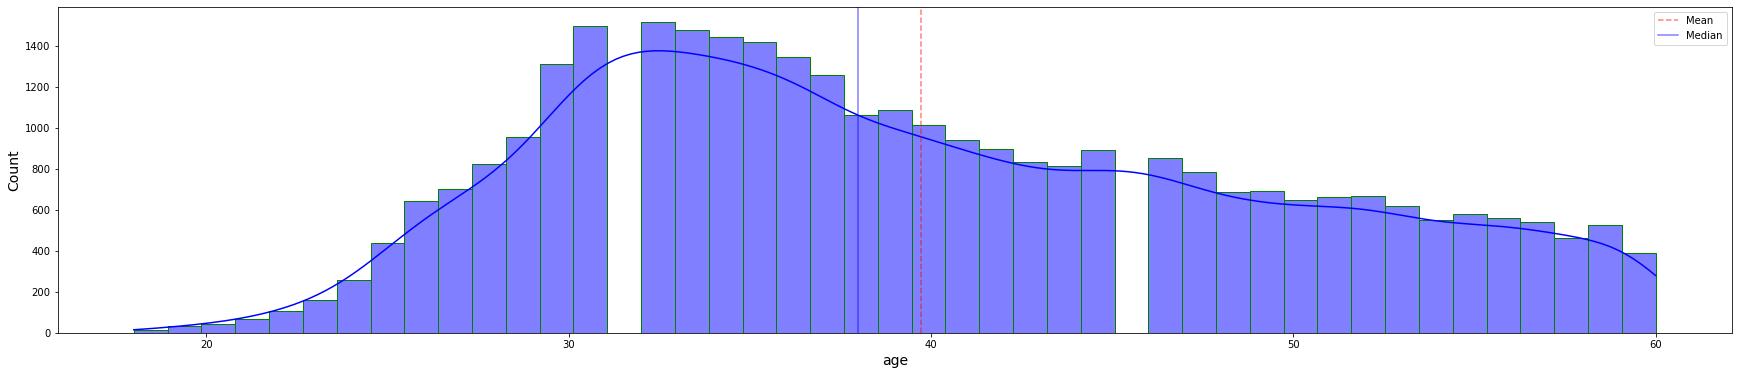

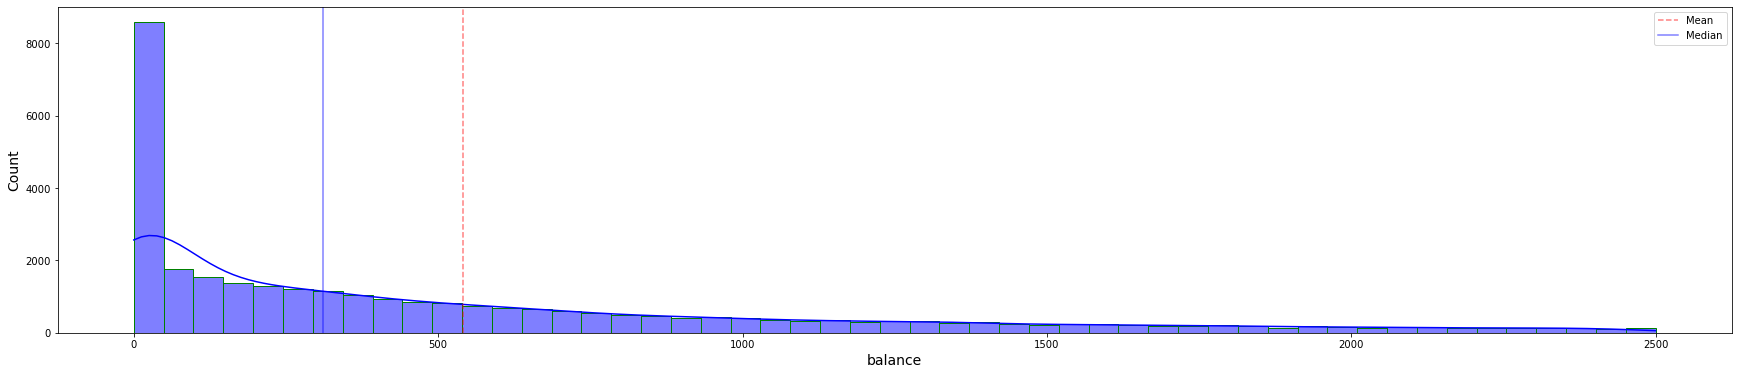

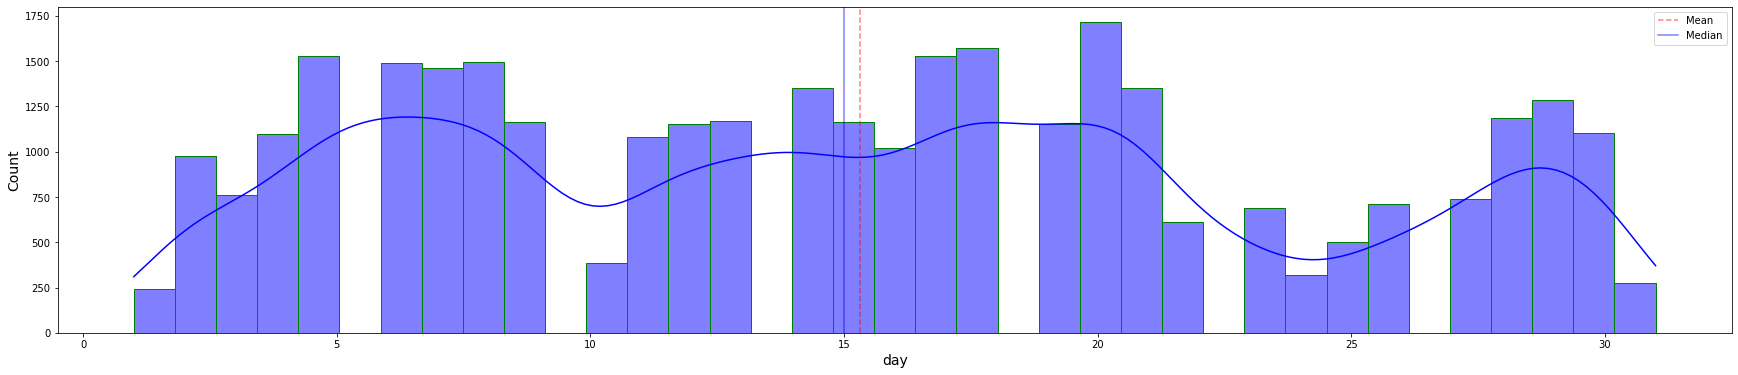

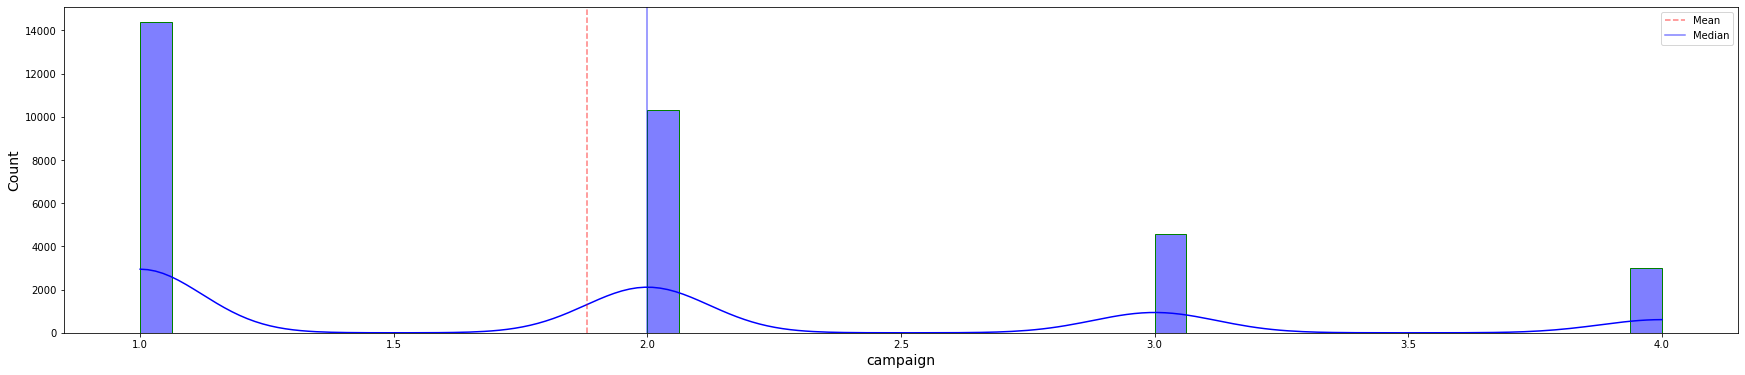

In [50]:
for column in num:
    sns.histplot(x=bank_marketing_data[column],kde=True, color='b', edgecolor='green',)
    plt.axvline(x=bank_marketing_data[column].mean(),ls='--',color='red',alpha=0.5,Label='Mean')
    plt.axvline(x=bank_marketing_data[column].median(),color='blue',alpha=0.5,label='Median') 
    plt.xlabel( column, fontsize=14)
    plt.ylabel('Count', fontsize=14) 
    plt.legend()
    plt.show()

In [51]:
#finding outliers based on plot results using IQR Method
def check_outlier_IQR(column):
    print(f"Feature is: {column}")
    Q1=np.percentile(bank_marketing_data[column],25,interpolation='midpoint')
    Q2=np.percentile(bank_marketing_data[column],50,interpolation='midpoint')
    Q3=np.percentile(bank_marketing_data[column],75,interpolation='midpoint')
    IQR=Q3-Q1
    print(f"IQR is: {IQR}")
    low_lim=Q1-1.5*IQR
    up_lim=Q3+1.5*IQR
    print(f"low_lim is: {low_lim}")
    print(f"up_lim is: {up_lim}")
    outlier=[]
    for x in bank_marketing_data[column]:
        if ((x>up_lim) or (x<low_lim)):
            outlier.append(x)
    print(f'total outlier in  {column}  is: {len(outlier)} \n \n')

In [52]:
num=['age', 'day','balance',  'campaign']

for column in num:
    check_outlier_IQR(column)

Feature is: age
IQR is: 15.0
low_lim is: 9.5
up_lim is: 69.5
total outlier in  age  is: 0 
 

Feature is: day
IQR is: 13.0
low_lim is: -11.5
up_lim is: 40.5
total outlier in  day  is: 0 
 

Feature is: balance
IQR is: 791.0
low_lim is: -1151.5
up_lim is: 2012.5
total outlier in  balance  is: 1328 
 

Feature is: campaign
IQR is: 1.0
low_lim is: -0.5
up_lim is: 3.5
total outlier in  campaign  is: 2978 
 



In [53]:
#findind outliers based on plot results using Z Score Method
def check_outlier_ZScorevalues(column):
    outlier=[]
    z=np.abs(stats.zscore(bank_marketing_data[column])) 
    threshold=3
    outlier.append(np.where(z>3))
    threshold=-3
    outlier.append(np.where(z<-3))
    print(f'total outlier in  {column}  is: {outlier}  \n \n')

In [57]:
num=['age','day' ,'balance',  'campaign']

for column in num:
    check_outlier_ZScorevalues(column)

total outlier in  age  is: [(array([], dtype=int64),), (array([], dtype=int64),)]  
 

total outlier in  day  is: [(array([], dtype=int64),), (array([], dtype=int64),)]  
 

total outlier in  balance  is: [(array([  391,   401,   884,  1112,  1212,  1237,  1305,  1593,  1717,
        1745,  1751,  1793,  1918,  2026,  2109,  2493,  2511,  2850,
        2918,  3270,  3702,  4251,  4601,  5005,  5169,  5301,  5331,
        5364,  5427,  5491,  5589,  5675,  5698,  5721,  5747,  5880,
        6083,  6235,  6246,  6257,  6396,  6737,  6879,  6998,  7013,
        7053,  7956,  8001,  8176,  8320,  8371,  8403,  8417,  8441,
        8462,  8485,  8590,  8651,  8699,  8703,  8805,  9089,  9257,
        9281,  9558,  9682, 10016, 10144, 10236, 10256, 10296, 10430,
       10446, 10567, 10639, 10712, 11012, 11025, 11075, 11104, 11213,
       11501, 12160, 12685, 12722, 12954, 13548, 13849, 13887, 13900,
       13923, 14242, 14307, 14403, 14455, 14628, 14688, 14807, 14847,
       14923, 14995, 15

Z score and IQR both methods shows we have still outliners in campaign and balance features


Now trying to remove Outliners using log transformation because   we have some left skewed data.

I am going to use square root transformation and log(x+1) because we have  zero data

In [54]:
def sqrt_transformation(column): # function for checking log transformation
    before =bank_marketing_data[column].skew()
    after=np.sqrt(bank_marketing_data[column]).skew()
    print(f'skewness in {column} \n before: {before} \n after:  {after}')
    sns.distplot(np.sqrt(bank_marketing_data[column]))
    plt.axvline(x=np.sqrt(bank_marketing_data[column]).mean(),ls='--',color='red',alpha=0.5,Label='Mean')
    plt.axvline(x=np.sqrt(bank_marketing_data[column]).median(),color='blue',alpha=0.5,label='Median') 
    plt.xlabel( column, fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.legend()
    plt.show() 

skewness in balance 
 before: 1.2956165995329956 
 after:  0.3186743546046191


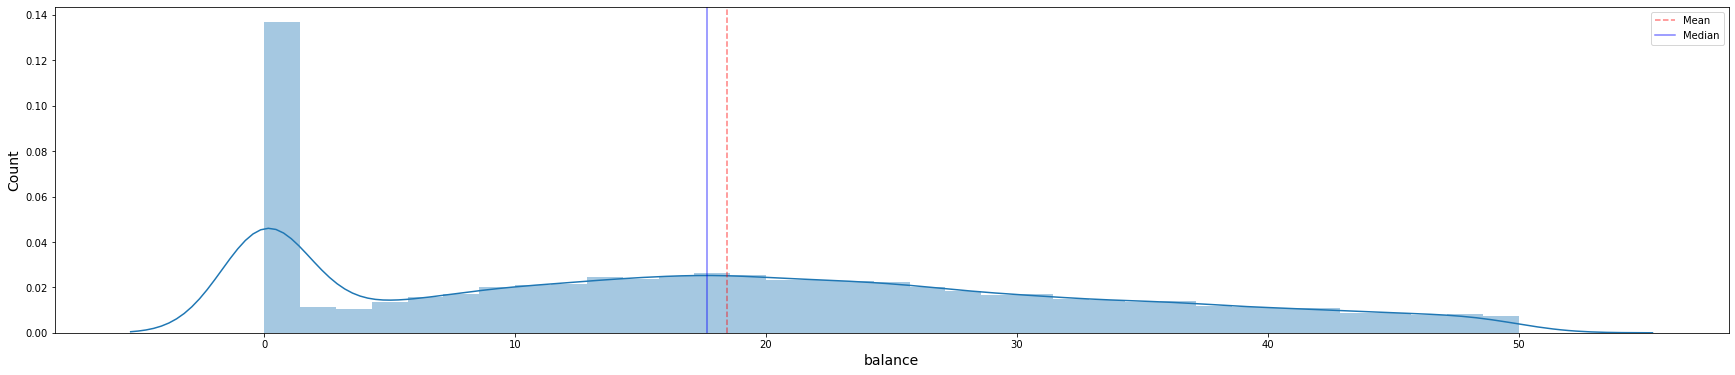

skewness in campaign 
 before: 0.8435775025594338 
 after:  0.5510341739569152


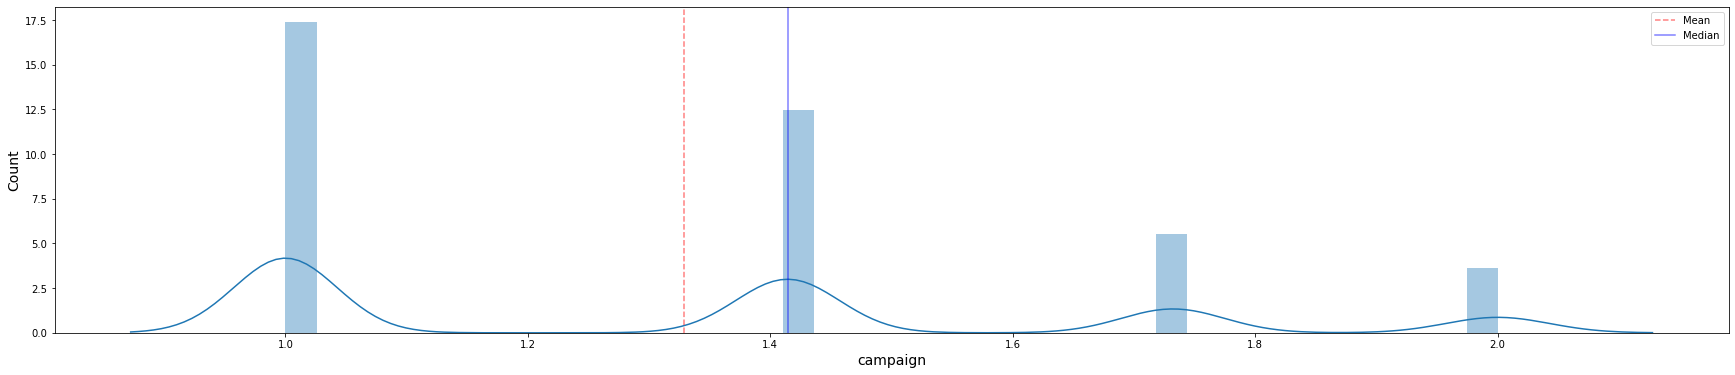

In [55]:
num=[  'balance',  'campaign']
for column in num:
    sqrt_transformation(column)

skewness in balance 
 before: 1.2956165995329956 
 after:  -0.9152557031016231


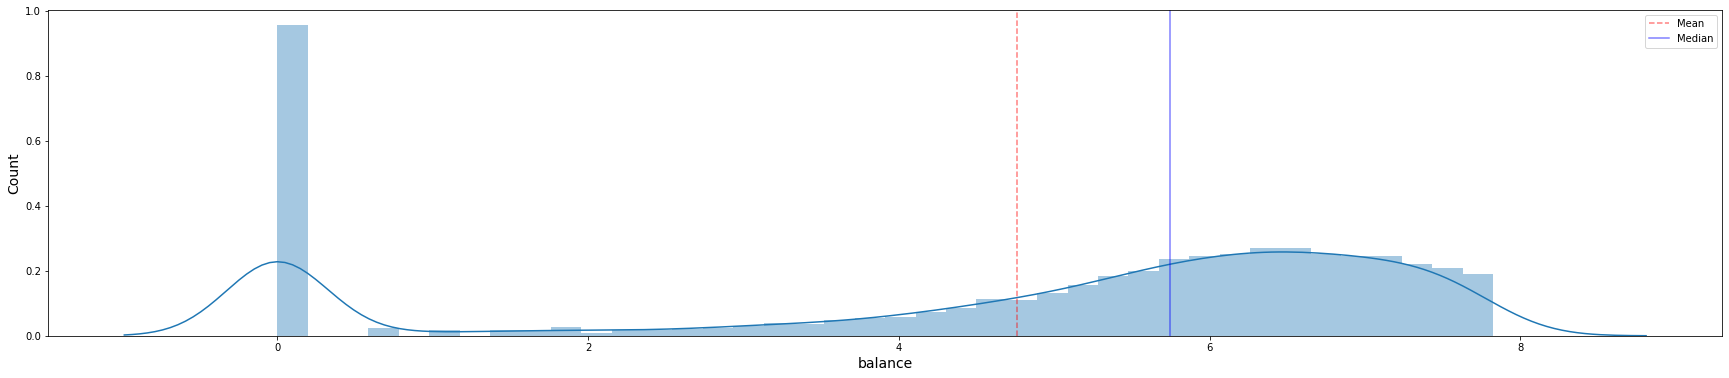

skewness in campaign 
 before: 0.8435775025594338 
 after:  0.46141258488534737


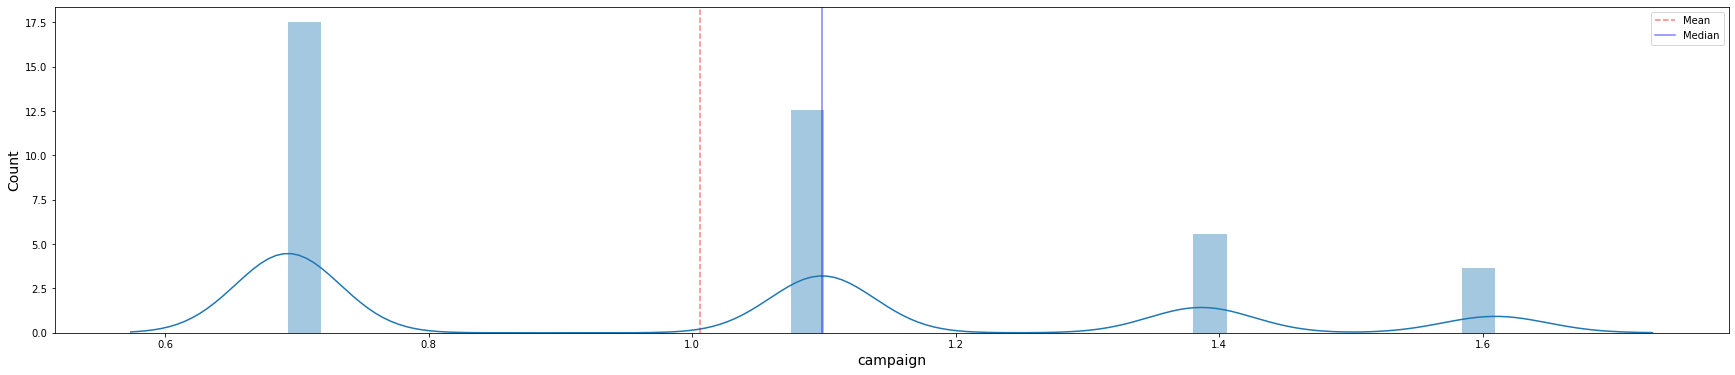

In [56]:
def log_transformation(column): # function for checking log transformation
    before =bank_marketing_data[column].skew()
    after=np.log(bank_marketing_data[column]+1).skew()
    print(f'skewness in {column} \n before: {before} \n after:  {after}')
    sns.distplot(np.log(bank_marketing_data[column]+1))
    plt.axvline(x=np.log(bank_marketing_data[column]+1).mean(),ls='--',color='red',alpha=0.5,Label='Mean')
    plt.axvline(x=np.log(bank_marketing_data[column]+1).median(),color='blue',alpha=0.5,label='Median') 
    plt.xlabel( column, fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.legend()
    plt.show() 
    

for column in num:
    log_transformation(column)

observation: seems sqrt transformation covering skewness better so applying it in original data set

In [58]:
for column in num:
    bank_marketing_data[column]=np.sqrt(bank_marketing_data[column])

after transformation data distribution in transformed features

<AxesSubplot:xlabel='campaign', ylabel='Count'>

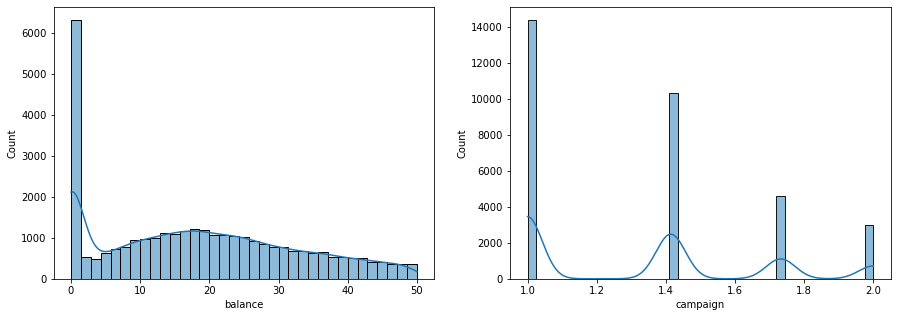

In [59]:
fig,ax=plt.subplots(1,2,figsize=(15,5))

sns.histplot(data=bank_marketing_data['balance'],kde=True, ax=ax[0])
sns.histplot(data=bank_marketing_data['campaign'],kde=True, ax=ax[1])


#### Univariant analysis

In [60]:
def countplot_withY(label,figw,figh):
  plt.figure(figsize=(figw,figh))
  Y = bank_marketing_data[label]
  total = len(Y)
  ax=sns.countplot(x=label, data=bank_marketing_data, hue="y")
  ax.yaxis.set_ticks(np.linspace(0, total, 11)) 
  ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
  ax.set_xticklabels(ax.get_xticklabels() , ha="right") 
  plt.show()

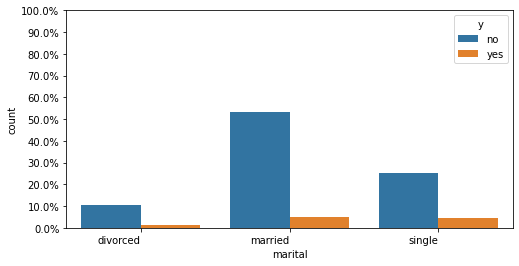

In [61]:
countplot_withY('marital',8,4)
#mostly married couples going for loans

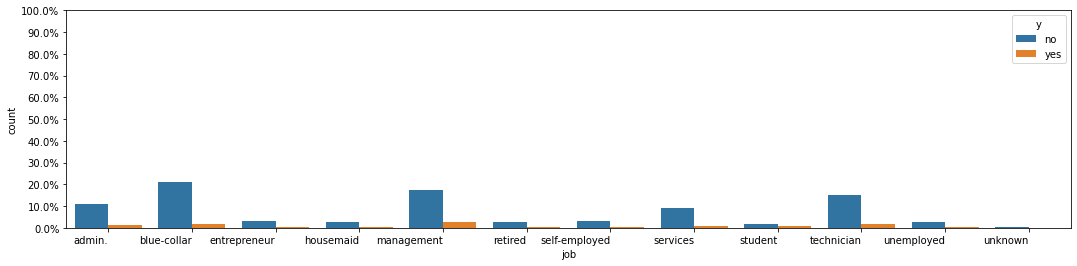

In [62]:
countplot_withY('job',18,4)
#the mostly having good job persons are going for loans 

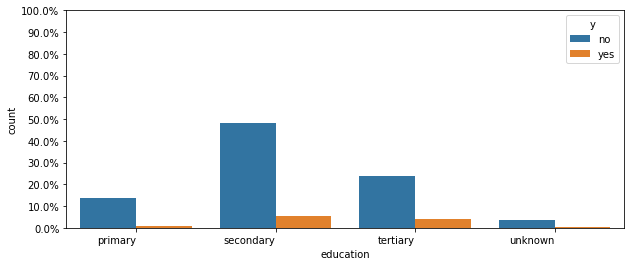

In [63]:
countplot_withY('education',10,4)
#higher educated persons are going for loans

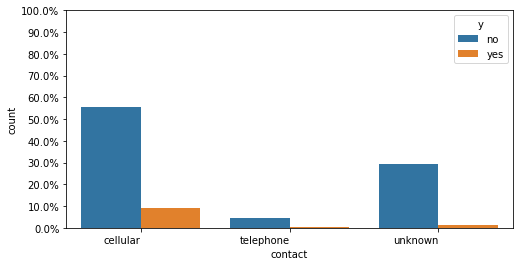

In [64]:
countplot_withY('contact',8,4)
#the persons who have mobile easily accessible

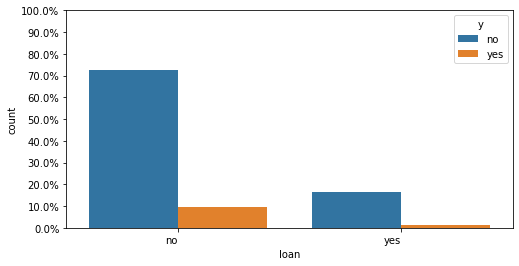

In [65]:
countplot_withY('loan',8,4)

overview: mostly yes for the loans from the person who have no loans already.

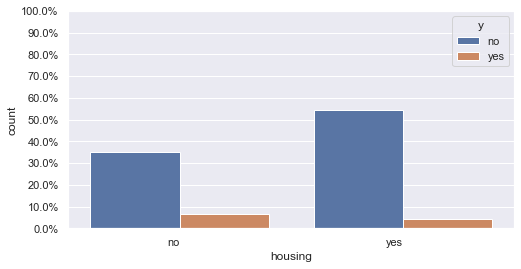

In [68]:
countplot_withY('housing',8,4)

infrence is the ones whi doesn't have house day yes more for the loans

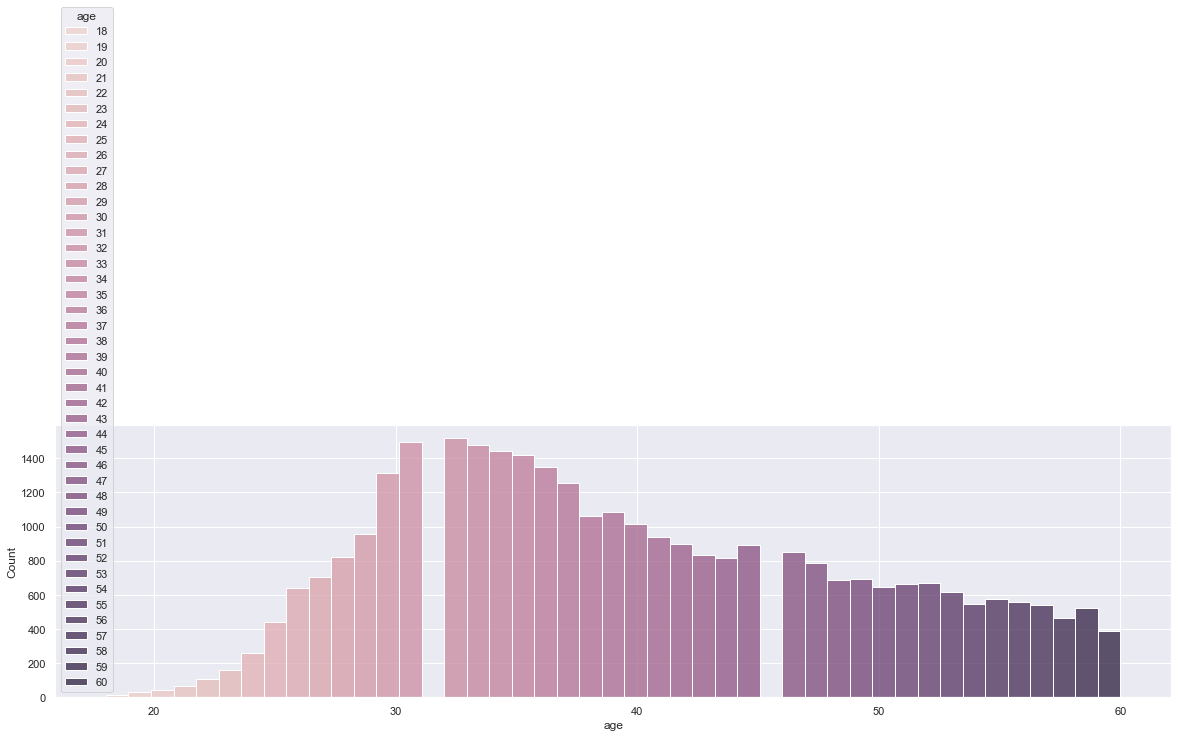

In [72]:
sns.set(rc={'figure.figsize':(20,5)})
sns.histplot(data=bank_marketing_data, x="age", hue="age", multiple="stack"  );

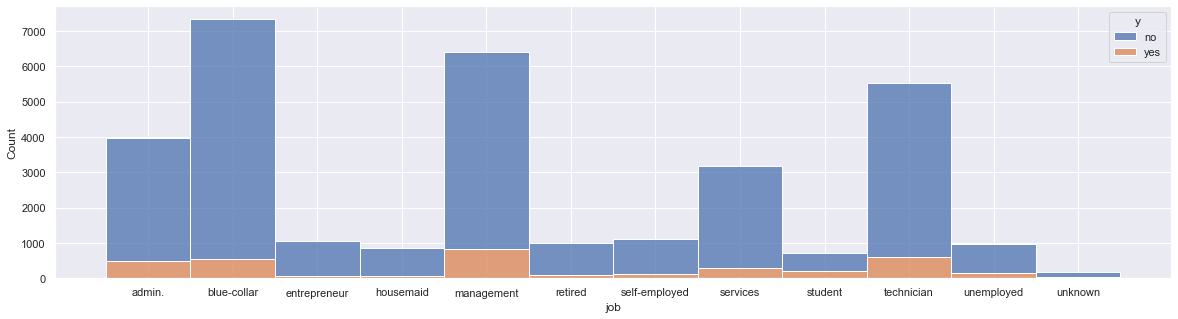

In [66]:
sns.set(rc={'figure.figsize':(20,5)})
sns.histplot(data=bank_marketing_data, x="job", hue="y", multiple="stack"  );

overview: mostly yes from the person who are in jobs .

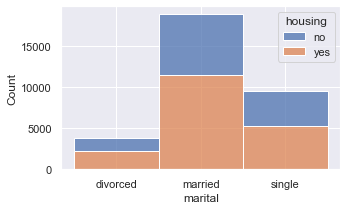

In [67]:
sns.set(rc={'figure.figsize':(5,3)})
sns.histplot(data=bank_marketing_data, x="marital", hue="housing", multiple="stack"  );

overview: mostly married persons already have a house, which is showing there social econmical status is well

In [672]:
#data comparison for checking if there is any pattern between the people who says yes or no

In [72]:
marketing_data_n=bank_marketing_data[bank_marketing_data['y']=='no']
marketing_data_y=bank_marketing_data[bank_marketing_data['y']=='yes']

In [73]:
marketing_data_n.shape

(28770, 15)

In [75]:
marketing_data_y.shape

(3503, 15)

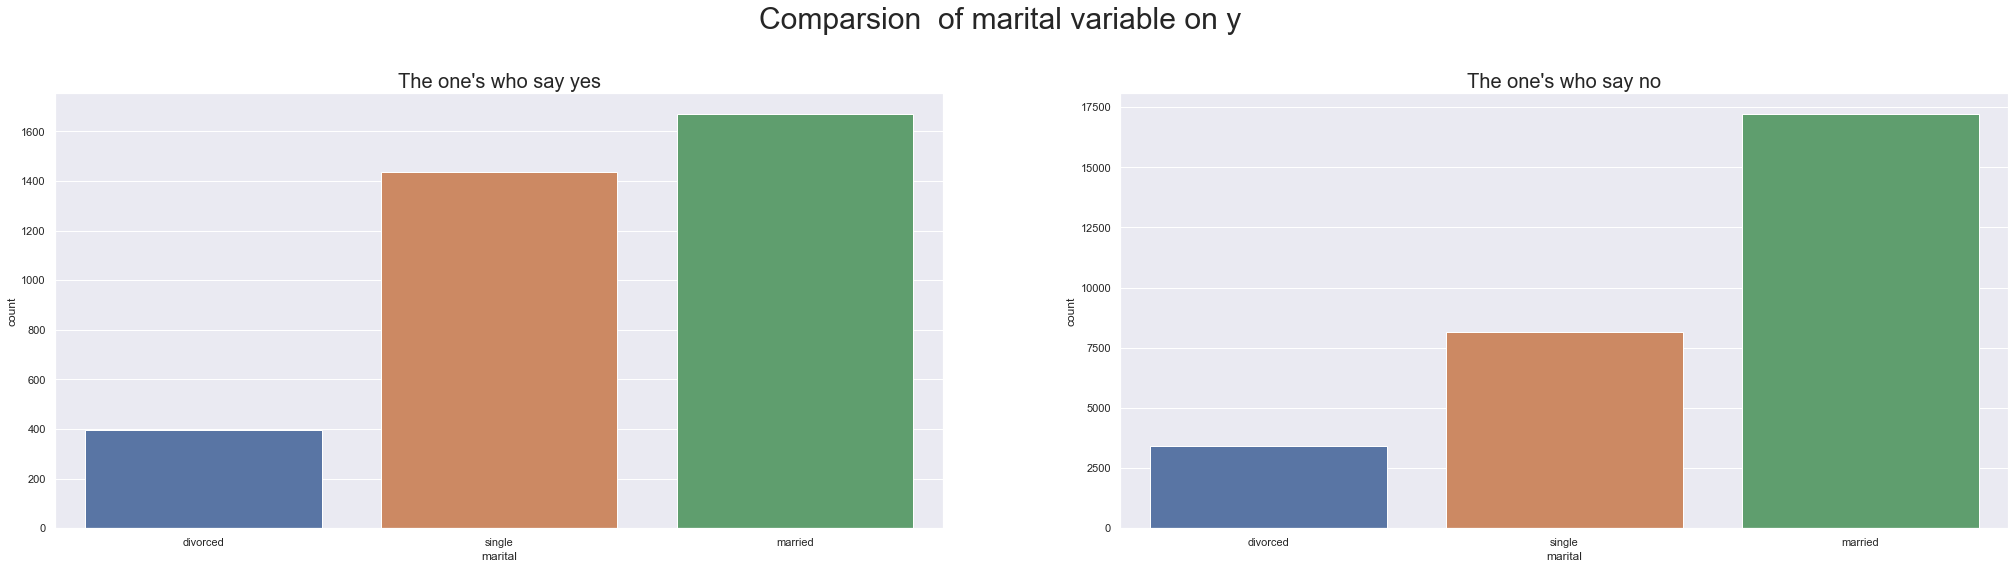

In [103]:
plt.rcParams["figure.figsize"] = (35,8)
f, axes = plt.subplots(1, 2)
maritaly = marketing_data_y['marital']
sns.countplot(x= maritaly ,data =marketing_data_y,orient='v',order=maritaly.value_counts().sort_values().index,ax=axes[0]).set_title('The one\'s who say yes', fontsize=20)
maritaln = marketing_data_n['marital'] 
sns.countplot(x= maritaln ,data =marketing_data_n,order=maritaln.value_counts().sort_values().index,orient='v').set_title('The one\'s who say no', fontsize=20);
plt.suptitle('Comparsion  of marital variable on y', y=1.03, fontsize=30)
plt.show()


In result we can say that the singles go for loan more than the singles who declined so we can go for more singles

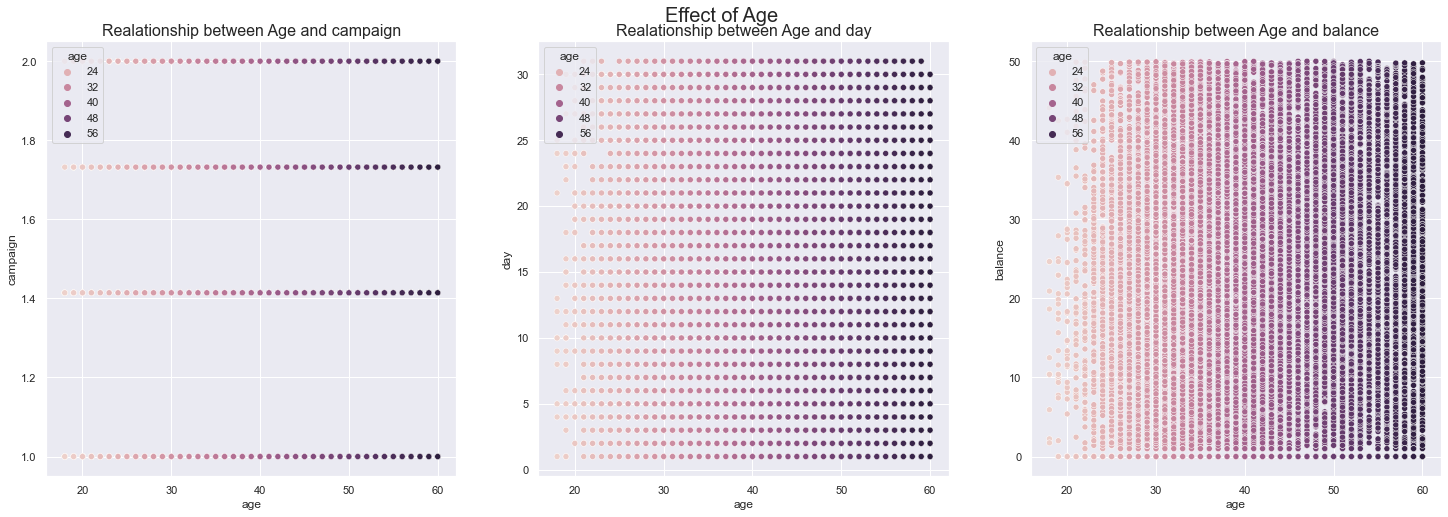

In [66]:
x_col = 'age'
y_columns = ['campaign', 'day', 'balance' ]
count=1
plt.subplots(figsize=(25, 8))
for i in y_columns:
    plt.subplot(1,3,count)
    ax = plt.gca()
    sns.scatterplot(bank_marketing_data[x_col],bank_marketing_data[i],color='r',hue=bank_marketing_data[x_col], marker="o")
    ax.set_xlabel(x_col)
    ax.set_ylabel(i)
    ax.set_title("Realationship between Age and {}".format(i), fontsize=16)
    count+=1
plt.suptitle('Effect of Age', y=0.94, fontsize=20)
plt.show()

from the above plot we can say that the data is evenly distributed for each other